## Problem Statement

To predict employee attrition using CatBoost and XgBoost 

### Install CatBoost

In [ ]:
!pip -qq install catboost

### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') 
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [ ]:
# read the dataset
# YOUR CODE HERE
df_emp_attr = pd.read_csv('wa_fn_usec_hr_employee_attrition_tsv.csv')

In [ ]:
#pd.set_option('display.max_columns', 10)   # set maximum number of columns to be displayed
df_emp_attr.head(5)

age attrition     businesstravel  dailyrate              department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   distancefromhome  education educationfield  employeecount  employeenumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   environmentsatisfaction  gender  hourlyrate  jobinvolvement  joblevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 jobrole  jobsatisfaction maritalstatus  monthlyincome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   monthlyrate  numcompaniesworked over18 overtime  percentsalaryhike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   performancerating  relationshipsatisfaction  standardhours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   worklifebalance  yearsatcompany  yearsincurrentrole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   yearssincelastpromotion  yearswithcurrmanager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
# Check the shape of dataframe. 
# YOUR CODE HERE
df_emp_attr.shape

(1470, 35)

In [ ]:
df_emp_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [ ]:
df_emp_attr.dtypes.value_counts()             # Count of data types in a dataframe

int64     26
object     9
dtype: int64

***(i). Checking Missing Value in Dataset***

In [ ]:
# YOUR CODE HERE
df_emp_attr.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

***Dataset does not have any missing value***

***(ii). Checking for Duplicate Rows***

In [ ]:
df_emp_attr[df_emp_attr.duplicated()]

Empty DataFrame
Columns: [age, attrition, businesstravel, dailyrate, department, distancefromhome, education, educationfield, employeecount, employeenumber, environmentsatisfaction, gender, hourlyrate, jobinvolvement, joblevel, jobrole, jobsatisfaction, maritalstatus, monthlyincome, monthlyrate, numcompaniesworked, over18, overtime, percentsalaryhike, performancerating, relationshipsatisfaction, standardhours, stockoptionlevel, totalworkingyears, trainingtimeslastyear, worklifebalance, yearsatcompany, yearsincurrentrole, yearssincelastpromotion, yearswithcurrmanager]
Index: []

***No duplicate rows found***

***(iii). Displaying Statistical description of Dataset***

In [ ]:
df_emp_attr.describe().T

count          mean          std     min      25%  \
age                       1470.0     36.923810     9.135373    18.0    30.00   
dailyrate                 1470.0    802.485714   403.509100   102.0   465.00   
distancefromhome          1470.0      9.192517     8.106864     1.0     2.00   
education                 1470.0      2.912925     1.024165     1.0     2.00   
employeecount             1470.0      1.000000     0.000000     1.0     1.00   
employeenumber            1470.0   1024.865306   602.024335     1.0   491.25   
environmentsatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
hourlyrate                1470.0     65.891156    20.329428    30.0    48.00   
jobinvolvement            1470.0      2.729932     0.711561     1.0     2.00   
joblevel                  1470.0      2.063946     1.106940     1.0     1.00   
jobsatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
monthlyincome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
monthlyrate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
numcompaniesworked        1470.0      2.693197     2.498009     0.0     1.00   
percentsalaryhike         1470.0     15.209524     3.659938    11.0    12.00   
performancerating         1470.0      3.153741     0.360824     3.0     3.00   
relationshipsatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
standardhours             1470.0     80.000000     0.000000    80.0    80.00   
stockoptionlevel          1470.0      0.793878     0.852077     0.0     0.00   
totalworkingyears         1470.0     11.279592     7.780782     0.0     6.00   
trainingtimeslastyear     1470.0      2.799320     1.289271     0.0     2.00   
worklifebalance           1470.0      2.761224     0.706476     1.0     2.00   
yearsatcompany            1470.0      7.008163     6.126525     0.0     3.00   
yearsincurrentrole        1470.0      4.229252     3.623137     0.0     2.00   
yearssincelastpromotion   1470.0      2.187755     3.222430     0.0     0.00   
yearswithcurrmanager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
age                          36.0     43.00     60.0  
dailyrate                   802.0   1157.00   1499.0  
distancefromhome              7.0     14.00     29.0  
education                     3.0      4.00      5.0  
employeecount                 1.0      1.00      1.0  
employeenumber             1020.5   1555.75   2068.0  
environmentsatisfaction       3.0      4.00      4.0  
hourlyrate                   66.0     83.75    100.0  
jobinvolvement                3.0      3.00      4.0  
joblevel                      2.0      3.00      5.0  
jobsatisfaction               3.0      4.00      4.0  
monthlyincome              4919.0   8379.00  19999.0  
monthlyrate               14235.5  20461.50  26999.0  
numcompaniesworked            2.0      4.00      9.0  
percentsalaryhike            14.0     18.00     25.0  
performancerating             3.0      3.00      4.0  
relationshipsatisfaction      3.0      4.00      4.0  
standardhours                80.0     80.00     80.0  
stockoptionlevel              1.0      1.00      3.0  
totalworkingyears            10.0     15.00     40.0  
trainingtimeslastyear         3.0      3.00      6.0  
worklifebalance               3.0      3.00      4.0  
yearsatcompany                5.0      9.00     40.0  
yearsincurrentrole            3.0      7.00     18.0  
yearssincelastpromotion       1.0      3.00     15.0  
yearswithcurrmanager          3.0      7.00     17.0

***(iv). Creating Numerical and Categorical lists from the dataframe.***

In [ ]:
num_list, cat_list = [], []

for i_col in df_emp_attr.columns:
    if df_emp_attr[i_col].dtype == 'int64':
        num_list.append(i_col)
    else:
        cat_list.append(i_col)

In [ ]:
print('Numerical List: \n', num_list)
print('\n Catagorical List: \n', cat_list)

Numerical List: 
 ['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']

 Catagorical List: 
 ['attrition', 'businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime']


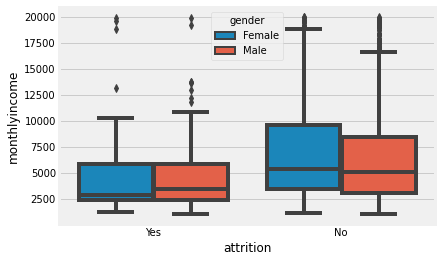

In [ ]:
sns.boxplot(x='attrition', y='monthlyincome', hue='gender', data=df_emp_attr)

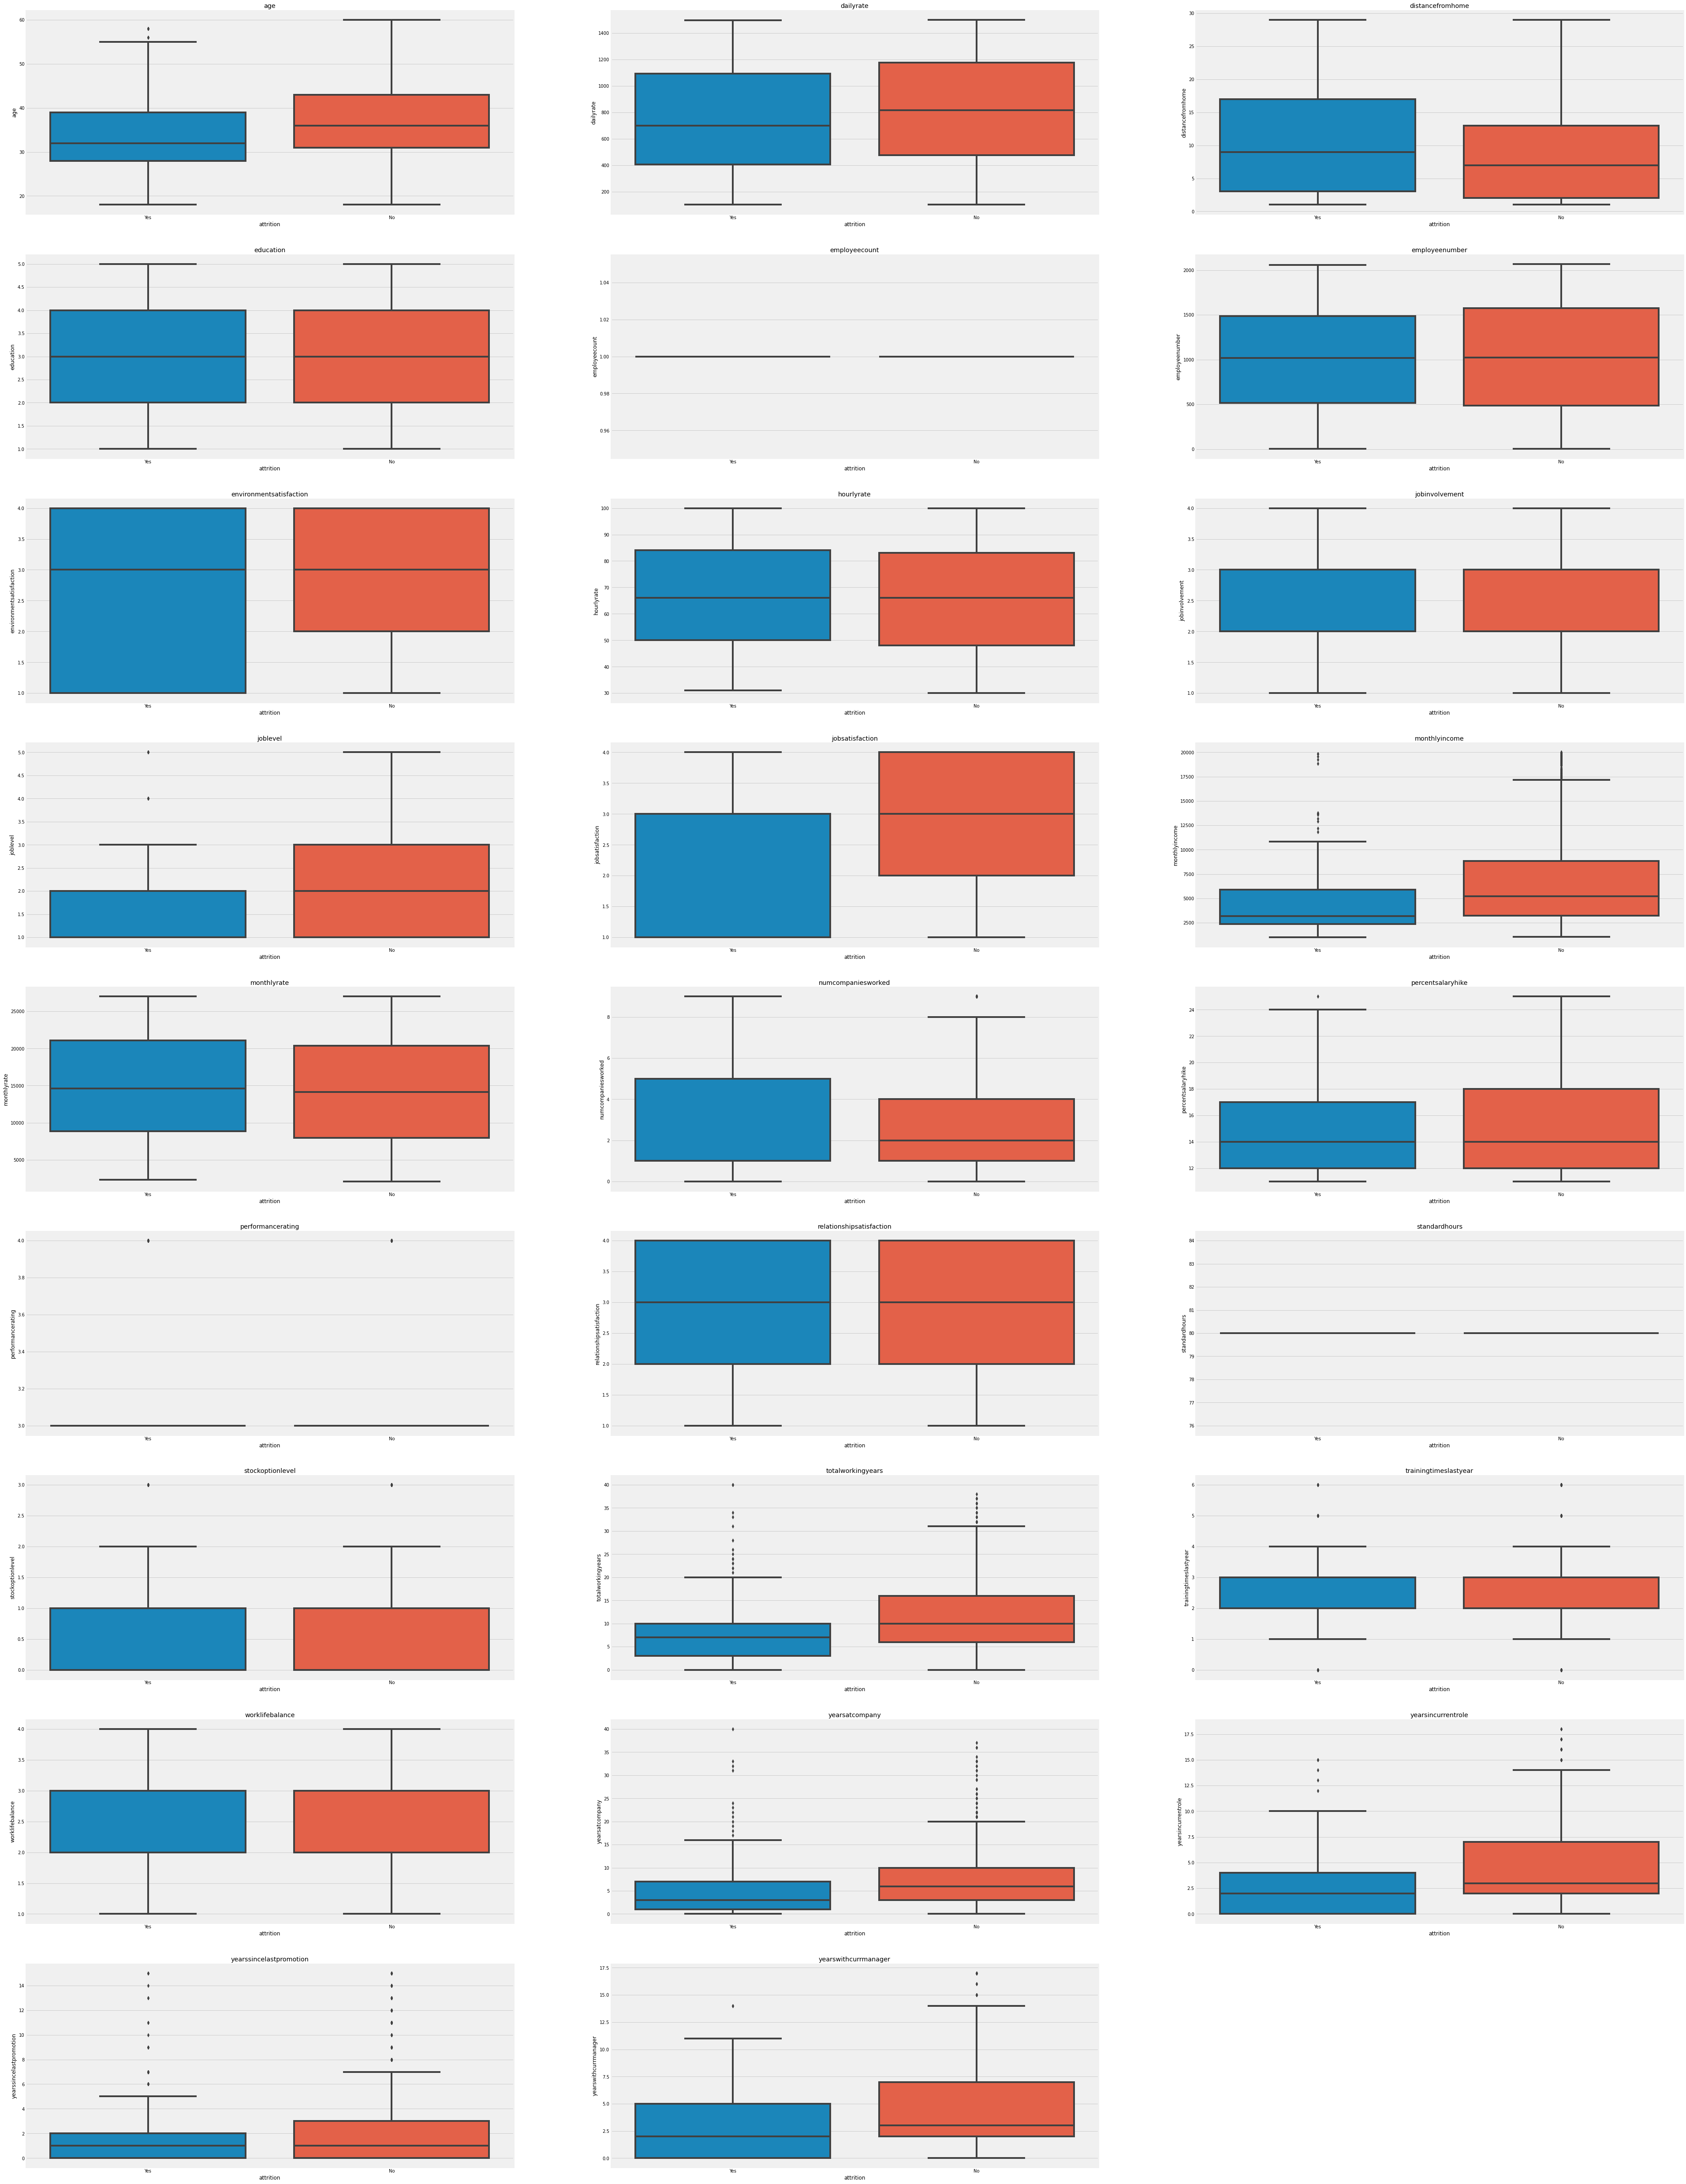

In [ ]:
plt.figure(figsize = (60,90))
for i,feature in enumerate(num_list):
    ax = plt.subplot(9,3,i+1)
    sns.boxplot(y = df_emp_attr[feature], x = df_emp_attr['attrition'])
    ax.set_title(feature)

***Observations:***

1. The employee who are younger are more likely leave the company.

2. The employees with low joblevel, less monthlyincome, less yearatcompany, and less totalworkingyears are more likely to quit the company.

3. The employees whose distance from home are more likely to quit then other employees.

4. The employees who got less percentage hike are more likely to quit.

5. The employees who has low job satisfaction more likely to quit.

***Outliers Detected:***

'monthlyincome','totalworkingyears', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager'

In [ ]:
for column in df_emp_attr.columns:
    print(f"{column}: Number of unique values {df_emp_attr[column].nunique()}")
    print("-------------------------------------------------------------------")

age: Number of unique values 43
-------------------------------------------------------------------
attrition: Number of unique values 2
-------------------------------------------------------------------
businesstravel: Number of unique values 3
-------------------------------------------------------------------
dailyrate: Number of unique values 886
-------------------------------------------------------------------
department: Number of unique values 3
-------------------------------------------------------------------
distancefromhome: Number of unique values 29
-------------------------------------------------------------------
education: Number of unique values 5
-------------------------------------------------------------------
educationfield: Number of unique values 6
-------------------------------------------------------------------
employeecount: Number of unique values 1
-------------------------------------------------------------------
employeenumber: Number of unique va

In [ ]:
const_cols = []
for i in df_emp_attr.columns:
    if df_emp_attr[i].nunique() == 1:
        const_cols.append(i)

print(const_cols)

['employeecount', 'over18', 'standardhours']


***Observations:***

*   There are few columns which has no use in dataset as they have single value.Those are ***'employeecount', 'over18' and 'standardhours'***. We can drop these.
Also, ***'employeenumber'*** has 1470 unique numbers. This is not useful for the predictions. This can also be dropped.
*   Outliers are clearly visible in above boxplots.





In [ ]:
# df_emp_attr.drop(['employeecount', 'over18', 'standardhours'], axis="columns", inplace=True)

In [ ]:
df_emp_attr_copy = df_emp_attr.copy()

In [ ]:
print("Shape before:", df_emp_attr_copy.shape)
df_emp_attr_copy.drop(const_cols, axis=1, inplace = True)
df_emp_attr_copy.drop(['employeenumber'], axis="columns", inplace=True)
print("Shape after:", df_emp_attr_copy.shape)

Shape before: (1470, 35)
Shape after: (1470, 31)


In [ ]:
num_list_new, cat_list_new = [], []

for i_col in df_emp_attr_copy.columns:
    if df_emp_attr_copy[i_col].dtype == 'int64':
        num_list_new.append(i_col)
    else:
        cat_list_new.append(i_col)

In [ ]:
print('Numerical List: \n', num_list_new)
print('\n Catagorical List: \n', cat_list_new)

Numerical List: 
 ['age', 'dailyrate', 'distancefromhome', 'education', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']

 Catagorical List: 
 ['attrition', 'businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'overtime']


In [ ]:
def detect_outliers_iqr(data):
    data = sorted(data)
    #q1 = data.quantile(0.25)
    #q3 = data.quantile(0.75)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print('25% Quantile: ',q1, ' \n 75% Quantile: ',q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print('Lower bound: ',lwr_bound, '\n Upper bound: ',upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers


In [ ]:
# YOUR CODE HERE
outliers = []
outliers_value = detect_outliers_iqr(df_emp_attr_copy['totalworkingyears'])
print("Outliers from IQR method: ", outliers_value)

25% Quantile:  6.0  
 75% Quantile:  15.0
Lower bound:  -7.5 
 Upper bound:  28.5
Outliers from IQR method:  [29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 38, 40, 40]


In [ ]:
outliers_cols = ['monthlyincome','totalworkingyears', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
for col in outliers_cols:
    outliers_val = detect_outliers_iqr(df_emp_attr_copy[col])
    print("Outliers from IQR method: ", outliers_val)

25% Quantile:  2911.0  
 75% Quantile:  8379.0
Lower bound:  -5291.0 
 Upper bound:  16581.0
Outliers from IQR method:  [29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 38, 40, 40, 16595, 16598, 16606, 16627, 16659, 16704, 16752, 16756, 16792, 16799, 16823, 16835, 16856, 16872, 16880, 16885, 16959, 17007, 17046, 17048, 17068, 17099, 17123, 17159, 17169, 17174, 17181, 17328, 17328, 17399, 17426, 17444, 17465, 17567, 17584, 17603, 17639, 17650, 17665, 17779, 17856, 17861, 17861, 17875, 17924, 18041, 18061, 18172, 18200, 18213, 18265, 18300, 18303, 18430, 18606, 18665, 18711, 18722, 18740, 18789, 18824, 18844, 18880, 18947, 19033, 19038, 19045, 19049, 19068, 19081, 19094, 19141, 19144, 19161, 19187, 19189, 19190, 19197, 19202, 19232, 19237, 19246, 19272, 19328, 19331, 19392, 19406, 19419, 19431, 1943

In [ ]:
# Recheck for outliers
# YOUR CODE HERE

In [ ]:
# Count of unique values in Attrition column
# YOUR CODE HERE
print('Count of unique values in Attrition column: ', df_emp_attr_copy['attrition'].nunique())
print('Count of different Attrition Values: \n', df_emp_attr_copy['attrition'].value_counts())

Count of unique values in Attrition column:  2
Count of different Attrition Values: 
 No     1233
Yes     237
Name: attrition, dtype: int64


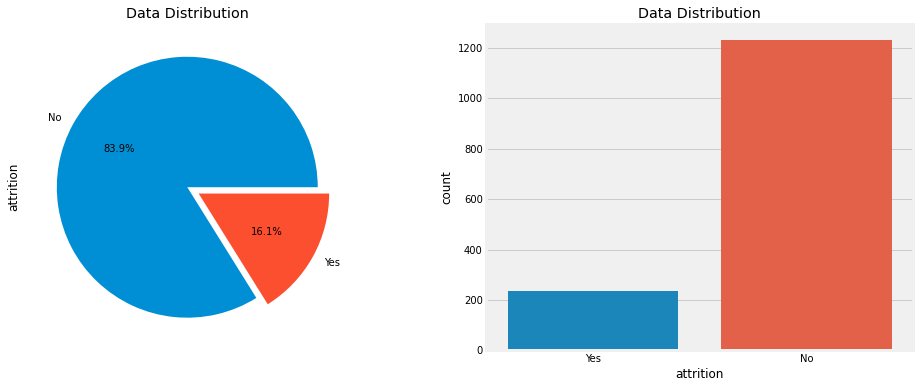

In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE

fig, axes = plt.subplots(1,2,figsize=(15,6))
df_emp_attr_copy['attrition'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('Data Distribution')


sns.countplot(x='attrition',data=df_emp_attr_copy,ax=axes[1])
axes[1].set_title('Data Distribution')
plt.show()

***From the Pie Chart, we can infer that out of 1470 employees, 16% of the employees left their job due to some reasons whereas other 84% of the employees preferred to continue their job at the company.***

***This distribution is highly imbalance and hence this is an Imbalance dataset.***

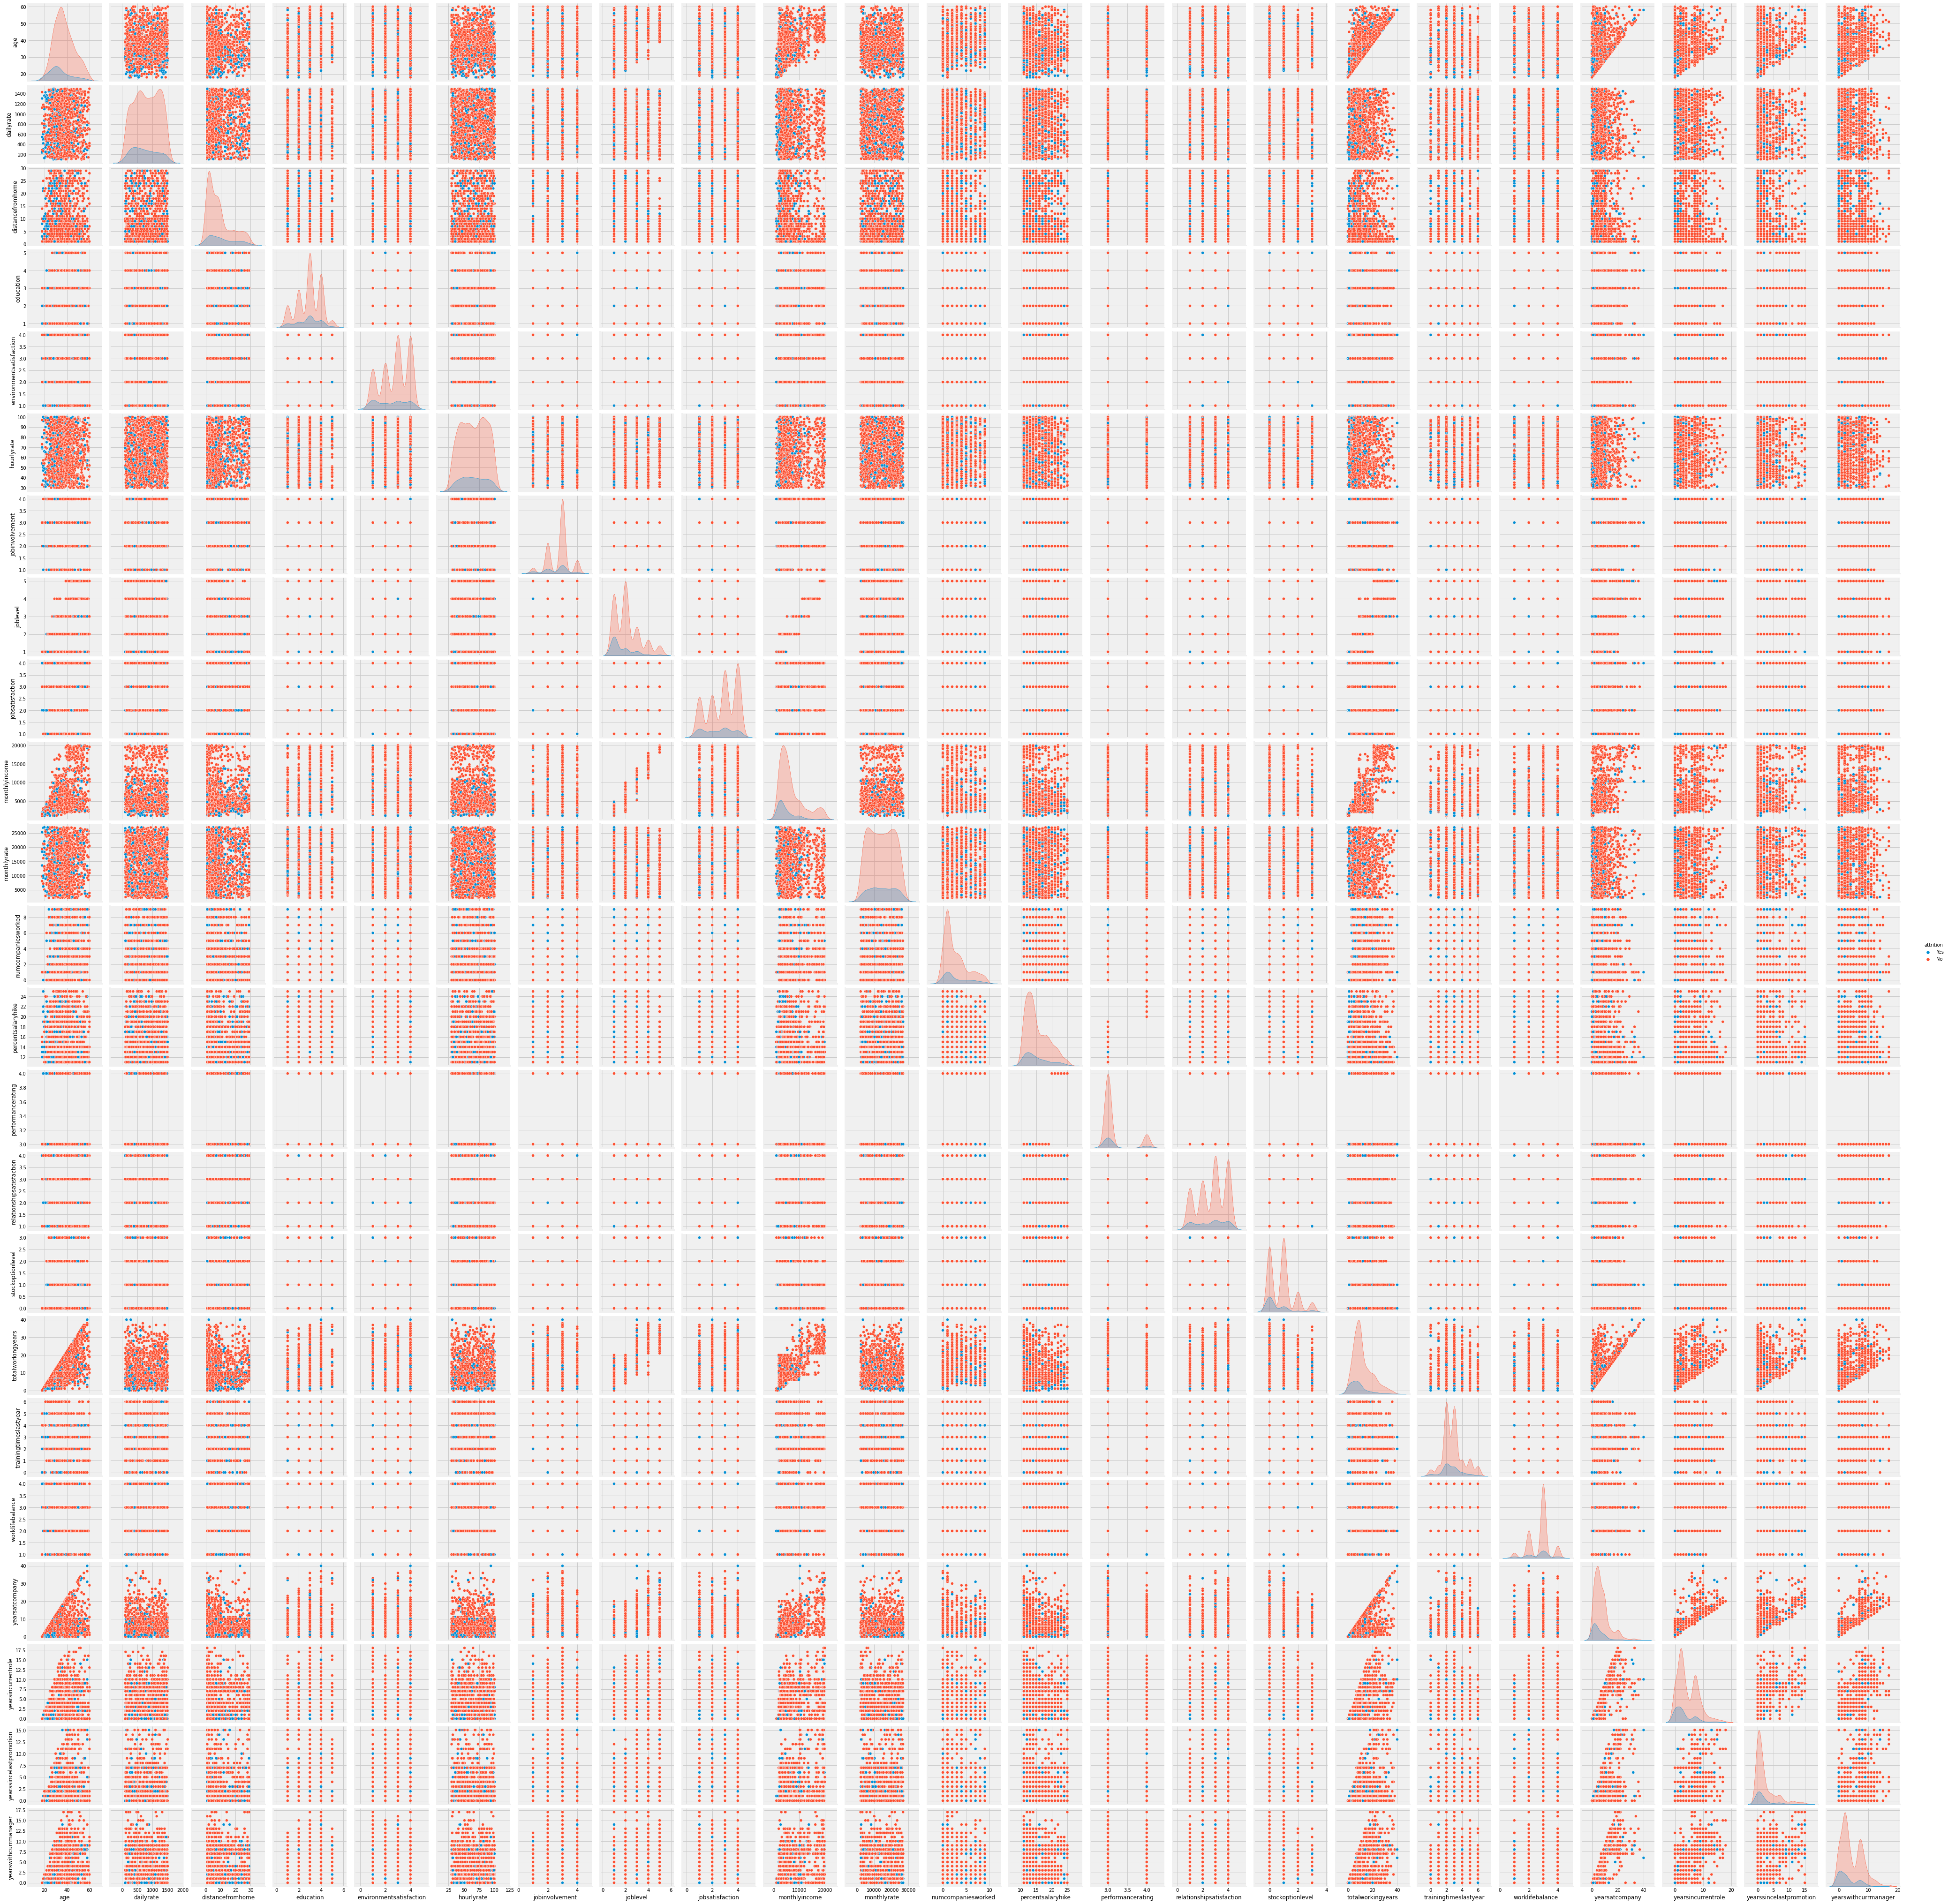

In [ ]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
pairplot = sns.pairplot(df_emp_attr_copy, diag_kind='kde', hue='attrition')
plt.show()

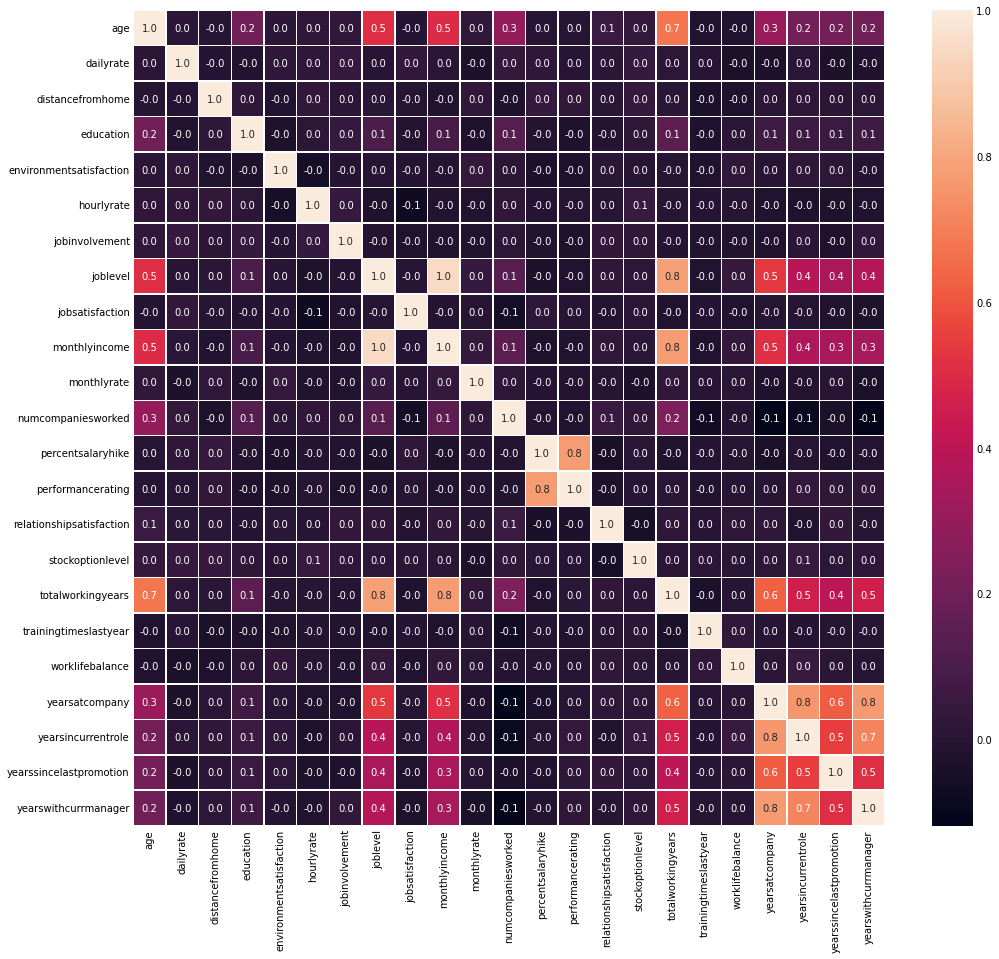

In [ ]:
# Visualize heatmap
# YOUR CODE HERE
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_emp_attr_copy.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

***Observations:***

*   'joblevel' and 'monthlyincome' are highly correlated.
*   'joblevel' and 'totalworkingyears' are correlated.
*   'percentsalaryhike'and 'performancerating' are correlated.
*   'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion' and 'yearswithcurrmanager' are highly correlated with each other.

Pairplots also look pretty much same for above columns.





In [ ]:
# YOUR CODE HERE
df_train_test = df_emp_attr_copy.copy()
le = LabelEncoder()
for i in cat_list_new:
    df_train_test[i]=le.fit_transform(df_train_test[i])

In [ ]:
df_train_test.head(2)

age  attrition  businesstravel  dailyrate  department  distancefromhome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   

   education  educationfield  environmentsatisfaction  gender  hourlyrate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   

   jobinvolvement  joblevel  jobrole  jobsatisfaction  maritalstatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   

   monthlyincome  monthlyrate  numcompaniesworked  overtime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   

   percentsalaryhike  performancerating  relationshipsatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   

   stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
0                 0                  8                      0   
1                 1                 10                      3   

   worklifebalance  yearsatcompany  yearsincurrentrole  \
0                1               6                   4   
1                3              10                   7   

   yearssincelastpromotion  yearswithcurrmanager  
0                        0                     5  
1                        1                     7

In [ ]:
# removing outliers with ZSCORE
from scipy.stats import zscore
z_score=abs(zscore(df_train_test))
print("The shape of dataset before removing outliers",df_train_test.shape)
z_score

The shape of dataset before removing outliers (1470, 31)


age  attrition  businesstravel  dailyrate  department  \
0     0.446350   2.280906        0.590048   0.742527    1.401512   
1     1.322365   0.438422        0.913194   1.297775    0.493817   
2     0.008343   2.280906        0.590048   1.414363    0.493817   
3     0.429664   0.438422        0.913194   1.461466    0.493817   
4     1.086676   0.438422        0.590048   0.524295    0.493817   
...        ...        ...             ...        ...         ...   
1465  0.101159   0.438422        0.913194   0.202082    0.493817   
1466  0.227347   0.438422        0.590048   0.469754    0.493817   
1467  1.086676   0.438422        0.590048   1.605183    0.493817   
1468  1.322365   0.438422        0.913194   0.546677    1.401512   
1469  0.320163   0.438422        0.590048   0.432568    0.493817   

      distancefromhome  education  educationfield  environmentsatisfaction  \
0             1.010909   0.891688        0.937414                 0.660531   
1             0.147150   1.868426        0.937414                 0.254625   
2             0.887515   0.891688        1.316673                 1.169781   
3             0.764121   1.061787        0.937414                 1.169781   
4             0.887515   1.868426        0.565311                 1.575686   
...                ...        ...             ...                      ...   
1465          1.703764   0.891688        0.565311                 0.254625   
1466          0.393938   1.868426        0.565311                 1.169781   
1467          0.640727   0.085049        0.937414                 0.660531   
1468          0.887515   0.085049        0.565311                 1.169781   
1469          0.147150   0.085049        0.565311                 0.660531   

        gender  hourlyrate  jobinvolvement  joblevel   jobrole  \
0     1.224745    1.383138        0.379672  0.057788  1.032716   
1     0.816497    0.240677        1.026167  0.057788  0.626374   
2     0.816497    1.284725        1.026167  0.961486  0.998992   
3     1.224745    0.486709        0.379672  0.961486  0.626374   
4     0.816497    1.274014        0.379672  0.961486  0.998992   
...        ...         ...             ...       ...       ...   
1465  0.816497    1.224807        1.785511  0.057788  0.998992   
1466  0.816497    1.175601        1.026167  0.845911  1.811675   
1467  0.816497    1.038693        1.785511  0.057788  0.186309   
1468  0.816497    0.142264        1.026167  0.057788  1.032716   
1469  0.816497    0.792660        1.785511  0.057788  0.998992   

      jobsatisfaction  maritalstatus  monthlyincome  monthlyrate  \
0            1.153254       1.236820       0.108350     0.726020   
1            0.660853       0.133282       0.291719     1.488876   
2            0.246200       1.236820       0.937654     1.674841   
3            0.246200       0.133282       0.763634     1.243211   
4            0.660853       0.133282       0.644858     0.325900   
...               ...            ...            ...          ...   
1465         1.153254       0.133282       0.835451     0.284329   
1466         1.567907       0.133282       0.741140     1.004010   
1467         0.660853       0.133282       0.076690     1.284418   
1468         0.660853       0.133282       0.236474     0.150393   
1469         0.246200       0.133282       0.445978     0.574124   

      numcompaniesworked  overtime  percentsalaryhike  performancerating  \
0               2.125136  1.591746           1.150554           0.426230   
1               0.678049  0.628241           2.129306           2.346151   
2               1.324226  1.591746           0.057267           0.426230   
3               0.678049  1.591746           1.150554           0.426230   
4               2.525591  0.628241           0.877232           0.426230   
...                  ...       ...                ...                ...   
1465            0.523316  0.628241           0.489376           0.426230   
1466            0.523316  0.628241     

In [ ]:
# 99% of the data points lie between +/- 3 standard deviation
df_train_test=df_train_test.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",df_train_test.shape)

The shape of dataset after removing outliers (1387, 31)


In [ ]:
X= df_train_test.drop(["attrition"],axis=1)
y= df_train_test["attrition"]

In [ ]:
X

age  businesstravel  dailyrate  department  distancefromhome  education  \
0      41               2       1102           2                 1          2   
1      49               1        279           1                 8          1   
2      37               2       1373           1                 2          2   
3      33               1       1392           1                 3          4   
4      27               2        591           1                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1                23          2   
1466   39               2        613           1                 6          1   
1467   27               2        155           1                 4          3   
1468   49               1       1023           2                 2          3   
1469   34               2        628           1                 8          3   

      educationfield  environmentsatisfaction  gender  hourlyrate  \
0                  1                        2       0          94   
1                  1                        3       1          61   
2                  4                        4       1          92   
3                  1                        4       0          56   
4                  3                        1       1          40   
...              ...                      ...     ...         ...   
1465               3                        3       1          41   
1466               3                        4       1          42   
1467               1                        2       1          87   
1468               3                        4       1          63   
1469               3                        2       1          82   

      jobinvolvement  joblevel  jobrole  jobsatisfaction  maritalstatus  \
0                  3         2        7                4              2   
1                  2         2        6                2              1   
2                  2         1        2                3              2   
3                  3         1        6                3              1   
4                  3         1        2                2              1   
...              ...       ...      ...              ...            ...   
1465               4         2        2                4              1   
1466               2         3        0                1              1   
1467               4         2        4                2              1   
1468               2         2        7                2              1   
1469               4         2        2                3              1   

      monthlyincome  monthlyrate  numcompaniesworked  overtime  \
0              5993        19479                   8         1   
1              5130        24907                   1         0   
2              2090         2396                   6         1   
3              2909        23159                   1         1   
4              3468        16632                   9         0   
...             ...          ...                 ...       ...   
1465           2571        12290                   4         0   
1466           9991        21457                   4         0   
1467           6142         5174                   1         1   
1468           5390        13243                   2         0   
1469           4404        10228                   2         0   

      percentsalaryhike  performancerating  relationshipsatisfaction  \
0                    11                  3                         1   
1                    23                  4                         4   
2                    15                  3                         2   
3                    11                  3                         3   
4                    12                  3                         4   
...                 ...                ...                       ...   
1465  

In [ ]:
#As this dataset is imbalance, applying SMOTE to balance
# SMOTE aims to balance class distribution by randomly increasing minority class examples by replicating them. No effect on columns, only rows.
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 2)
#x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1852, 30), (1852,), (464, 30), (464,))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test, classifier):
    pred = model.predict(X_test)
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    print("Training Results: \n------------------------------")
    clf_report = pd.DataFrame(classification_report(y_train, train_pred, output_dict=True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, train_pred)}")
    print(f"\n Accuracy Score:\n{accuracy_score(y_train, train_pred):.4f}")
    print(f"\n Classification Report:\n{clf_report}")
    print("\n")
    print("Testing Results: \n-------------------------------")
    clf_report = pd.DataFrame(classification_report(y_test, test_pred, output_dict=True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, test_pred)}")
    print(f"\n Accuracy Score:\n{accuracy_score(y_test, test_pred):.4f}")
    print(f"\n Classification Report:\n{clf_report}")

    results = {
        'Model': classifier,
        'Training AUC Score': accuracy_score(y_train, train_pred),
        'Testing AUC Score': accuracy_score(y_test, test_pred)
    }
    return results

In [ ]:
# Create CatBoost model
# YOUR CODE HERE
catboost_clf = CatBoostClassifier(iterations=5,
                                  learning_rate=0.1
                                  #loss_function='CrossEntropy'
                                  )
catboost_clf.fit(x_train, y_train,
                 #cat_features=cat_features,
                 eval_set = (x_test, y_test),
                 verbose = False)

In [ ]:
# Model training
# YOUR CODE HERE
catboost_result=evaluate(catboost_clf, x_train, x_test, y_train, y_test, 'CatBoost')

Training Results: 
------------------------------
Confusion Matrix:
[[781 145]
 [152 774]]

 Accuracy Score:
0.8396

 Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.837085    0.842220  0.839633     0.839652      0.839652
recall       0.843413    0.835853  0.839633     0.839633      0.839633
f1-score     0.840237    0.839024  0.839633     0.839631      0.839631
support    926.000000  926.000000  0.839633  1852.000000   1852.000000


Testing Results: 
-------------------------------
Confusion Matrix:
[[182  50]
 [ 46 186]]

 Accuracy Score:
0.7931

 Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.798246    0.788136  0.793103    0.793191      0.793191
recall       0.784483    0.801724  0.793103    0.793103      0.793103
f1-score     0.791304    0.794872  0.793103    0.793088      0.793088
support    232.000000  232.000000  0.793103  464.000000    464.000000


In [ ]:
catboost_result

{'Model': 'CatBoost',
 'Training AUC Score': 0.8396328293736501,
 'Testing AUC Score': 0.7931034482758621}

In [ ]:
# Create XGBoost classifier model
# YOUR CODE HERE
XGB_clf = XGBClassifier(learning_rate = 0.1)
XGB_clf.fit(x_train, y_train,
            eval_set = [(x_train, y_train), (x_test, y_test)],
            verbose = False)

XGBClassifier()

In [ ]:
# Model training
# YOUR CODE HERE
XGB_results=evaluate(XGB_clf, x_train, x_test, y_train, y_test,'XGB')

Training Results: 
------------------------------
Confusion Matrix:
[[872  54]
 [ 53 873]]

 Accuracy Score:
0.9422

 Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.942703    0.941748  0.942225     0.942225      0.942225
recall       0.941685    0.942765  0.942225     0.942225      0.942225
f1-score     0.942193    0.942256  0.942225     0.942225      0.942225
support    926.000000  926.000000  0.942225  1852.000000   1852.000000


Testing Results: 
-------------------------------
Confusion Matrix:
[[209  23]
 [ 31 201]]

 Accuracy Score:
0.8836

 Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.870833    0.897321  0.883621    0.884077      0.884077
recall       0.900862    0.866379  0.883621    0.883621      0.883621
f1-score     0.885593    0.881579  0.883621    0.883586      0.883586
support    232.000000  232.000000  0.883621  464.000000    464.000000


In [ ]:
# Model performance on all sets
# YOUR CODE HERE   
XGB_results

{'Model': 'XGB',
 'Training AUC Score': 0.9422246220302376,
 'Testing AUC Score': 0.8836206896551724}

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE 
LGBM_clf = LGBMClassifier(learning_rate = 0.1)
LGBM_clf.fit(x_train, y_train,
             eval_set = [(x_train, y_train), (x_test, y_test)],
             verbose = False)

LGBMClassifier()

In [ ]:
# Model training
# YOUR CODE HERE
LGBM_results=evaluate(LGBM_clf, x_train, x_test, y_train, y_test, 'LGBM')

Training Results: 
------------------------------
Confusion Matrix:
[[926   0]
 [  0 926]]

 Accuracy Score:
1.0000

 Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    926.0  926.0       1.0     1852.0        1852.0


Testing Results: 
-------------------------------
Confusion Matrix:
[[215  17]
 [ 26 206]]

 Accuracy Score:
0.9073

 Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.892116    0.923767  0.907328    0.907941      0.907941
recall       0.926724    0.887931  0.907328    0.907328      0.907328
f1-score     0.909091    0.905495  0.907328    0.907293      0.907293
support    232.000000  232.000000  0.907328  464.000000    464.000000


In [ ]:
# Model performance on all sets
# YOUR CODE HERE
LGBM_results

{'Model': 'LGBM',
 'Training AUC Score': 1.0,
 'Testing AUC Score': 0.9073275862068966}

In [ ]:
#print (roc_auc_score(y, LGBM_clf.predict(X)))

In [ ]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE
results = pd.DataFrame([catboost_result, XGB_results, LGBM_results])
results

Model  Training AUC Score  Testing AUC Score
0  CatBoost            0.839633           0.793103
1       XGB            0.942225           0.883621
2      LGBM            1.000000           0.907328